#FA7 - Cristobal

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import ptitprince as pt
from scipy.stats import shapiro
from scipy.stats import ttest_ind

#Loading Data

In [12]:
df = pd.read_csv("Eye Movements.csv")
df

,ParticipantNumber,Condition,CriticalRecall
0,1,Horizontal,4
1,3,Fixation,14
2,4,Horizontal,12
3,6,Fixation,4
4,7,Horizontal,11
5,9,Fixation,23
6,10,Horizontal,16
7,12,Fixation,22
8,13,Horizontal,9
9,15,Fixation,16


#Assumptions

##Assumption 1: Scale of Measurement

The scale of measurement is taken from the 'CriticalRecall' column and is assumed continuous.

##Assumption 2: Group Categorization


The 'Condition' column is taken as the independent variable, with 'Horizontal' and 'Fixation' taken as grouping categories.

In [13]:
conditions = df['Condition'].unique()

##Assumption 3: Independence of Observations

Assumed by the design of the experiment where the dataset is taken from.


##Assumption 4: Normality

Checking for Normality in the Condition column.

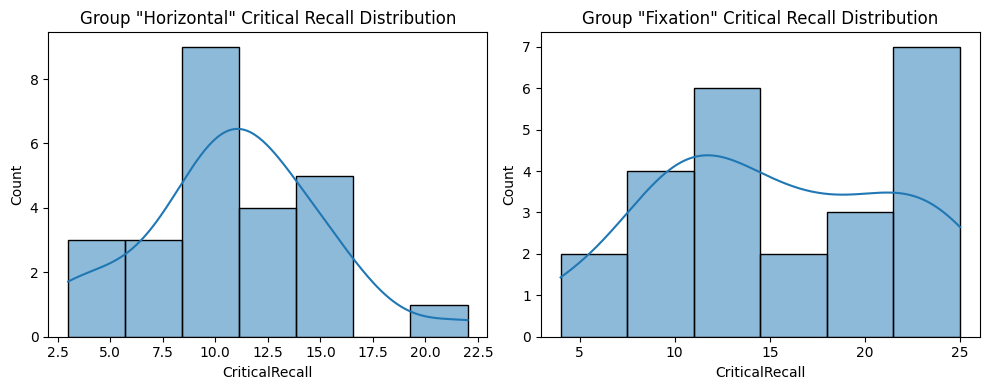

In [14]:
plt.figure(figsize=(10, 4))
for i, group in enumerate(conditions):
    plt.subplot(1, len(conditions), i+1)
    sns.histplot(df[df['Condition'] == group]['CriticalRecall'], kde=True)
    plt.title(f'Group "{group}" Critical Recall Distribution')
plt.tight_layout()
plt.show()

In [18]:
shapiro_horizontal = shapiro(horizontal)
shapiro_fixation = shapiro(fixation)
horizontal_statistic, horizontal_p_value = shapiro_horizontal
fixation_statistic, fixation_p_value = shapiro_fixation
print(f"Shapiro-Wilk Test for Horizontal Group\nStatistic: {horizontal_statistic:.4f}, P-value: {horizontal_p_value:.4f}")
print(f"Shapiro-Wilk Test for Fixation Group\nStatistic: {fixation_statistic:.4f}, P-value: {fixation_p_value:.4f}")

Shapiro-Wilk Test for Horizontal Group
Statistic: 0.9591, P-value: 0.3965
Shapiro-Wilk Test for Fixation Group
Statistic: 0.9260, P-value: 0.0794


Data is normal.

##Assumption 5: Homogeneity of Varriance


Homogeneity of varriance is tested using Levene's test.

In [16]:
horizontal = df[df['Condition'] == 'Horizontal']['CriticalRecall']
fixation = df[df['Condition'] == 'Fixation']['CriticalRecall']
levenes_test = stats.levene(horizontal, fixation)
levene_statistic, levene_p_value = levenes_test

levene_result_str = f"Levene's Test Statistic: {levene_statistic:.4f}\nLevene's Test P-value: {levene_p_value:.4f}"
print(levene_result_str)

Levene's Test Statistic: 7.5043
Levene's Test P-value: 0.0087


Since the p-value is less than .05, there is a significant difference between the variances.

##Independent T-test

Since there is a significant variance, we wil do the Welch's T-test.

In [17]:
t_statistic, p_value = ttest_ind(horizontal, fixation, equal_var=False)
print(f"Welch's t-test Statistic: {t_statistic:.4f}, P-value: {p_value:.4f}")

Welch's t-test Statistic: -2.8234, P-value: 0.0074


##Conclusion

In this study, we conducted Welch's t-test to compare the CriticalRecall scores between two conditions: Horizontal and Fixation. The results revealed a significant difference between the groups, with a test statistic of -2.8234 and a p-value of 0.0074. These findings led us to reject the null hypothesis, indicating that the difference in CriticalRecall scores is statistically significant and not due to random chance. Specifically, participants in the Horizontal condition demonstrated lower CriticalRecall scores compared to those in the Fixation condition.